In [10]:
import pandas as pd
import requests
from io import BytesIO

gen_opt_url = 'http://marketdata.krx.co.kr/contents/COM/GenerateOTP.jspx'
gen_opt_data={
    'name': 'fileDown',
    'filetype': 'csv',
    'url': 'MKD/04/0402/04020100/mkd04020100t3_02',
    'isu_cdnm':'',
    'isu_cd': 'KR7005930003',
    'isu_nm': '삼성전자',
    'isu_srt_cd': 'A005930',
    'fromdate': '20180604',
    'todate': '20180611',
    'pagePath': '/contents/MKD/04/0402/04020100/MKD04020100T3T2.jsp',

}

r=requests.post(gen_opt_url,gen_opt_data)
code=r.content

down_url = 'http://file.krx.co.kr/download.jspx'
down_data = {
    'code':code
}


r = requests.post(down_url,down_data)
# with open('A005930.csv','wb') as f:
#     f.write(r.content)
    
# df = pd.read_csv('A005930.csv')
# df.head()
f = BytesIO(r.content)
df = pd.read_csv(f,header=0,thousands=',')
df

,년/월/일,종가,대비,거래량(주),거래대금(원),시가,고가,저가,시가총액(백만),상장주식수(주)
0,2018/06/11,49900,250,10571312,526740265568,49750,50300,49350,320324303,6419324700
1,2018/06/08,49650,-950,16951706,845302641812,50200,50400,49600,318719471,6419324700
2,2018/06/07,50600,-700,13590016,692915776683,51800,51800,50500,324817830,6419324700
3,2018/06/05,51300,200,9144100,465525312900,51100,51400,50400,329311357,6419324700
4,2018/06/04,51100,-200,9767171,498093853200,50800,51200,50700,328027492,6419324700


In [11]:
print('item counts: {}'.format(len(df)))

item counts: 5


In [12]:
df = pd.read_excel('A005930.xls', thousands=',', parse_dates=['년/월/일'])
df.head()

,년/월/일,종가,대비,거래량(주),거래대금(원),시가,고가,저가,시가총액(백만),상장주식수(주)
0,2016-12-29,1802000,14000,150329,269850552000,1771000,1802000,1770000,253504165,140679337
1,2016-12-28,1788000,-11000,133258,238389027152,1792000,1799000,1780000,251534655,140679337
2,2016-12-27,1799000,1000,93069,167499160785,1799000,1810000,1793000,253082127,140679337
3,2016-12-26,1798000,16000,96472,173030035000,1780000,1800000,1778000,252941448,140679337
4,2016-12-23,1782000,-27000,166697,298604129418,1801000,1804000,1780000,250690579,140679337


In [13]:
df = df[['년/월/일',  '종가', '거래량(주)', '시가', '고가', '저가']]
df.head()

,년/월/일,종가,거래량(주),시가,고가,저가
0,2016-12-29,1802000,150329,1771000,1802000,1770000
1,2016-12-28,1788000,133258,1792000,1799000,1780000
2,2016-12-27,1799000,93069,1799000,1810000,1793000
3,2016-12-26,1798000,96472,1780000,1800000,1778000
4,2016-12-23,1782000,166697,1801000,1804000,1780000


In [14]:
df.columns = ['date', 'close', 'volume', 'open', 'hign', 'low']
df.set_index('date', inplace=True)
df.head()

,close,volume,open,hign,low
date,,,,,
2016-12-29,1802000,150329,1771000,1802000,1770000
2016-12-28,1788000,133258,1792000,1799000,1780000
2016-12-27,1799000,93069,1799000,1810000,1793000
2016-12-26,1798000,96472,1780000,1800000,1778000
2016-12-23,1782000,166697,1801000,1804000,1780000


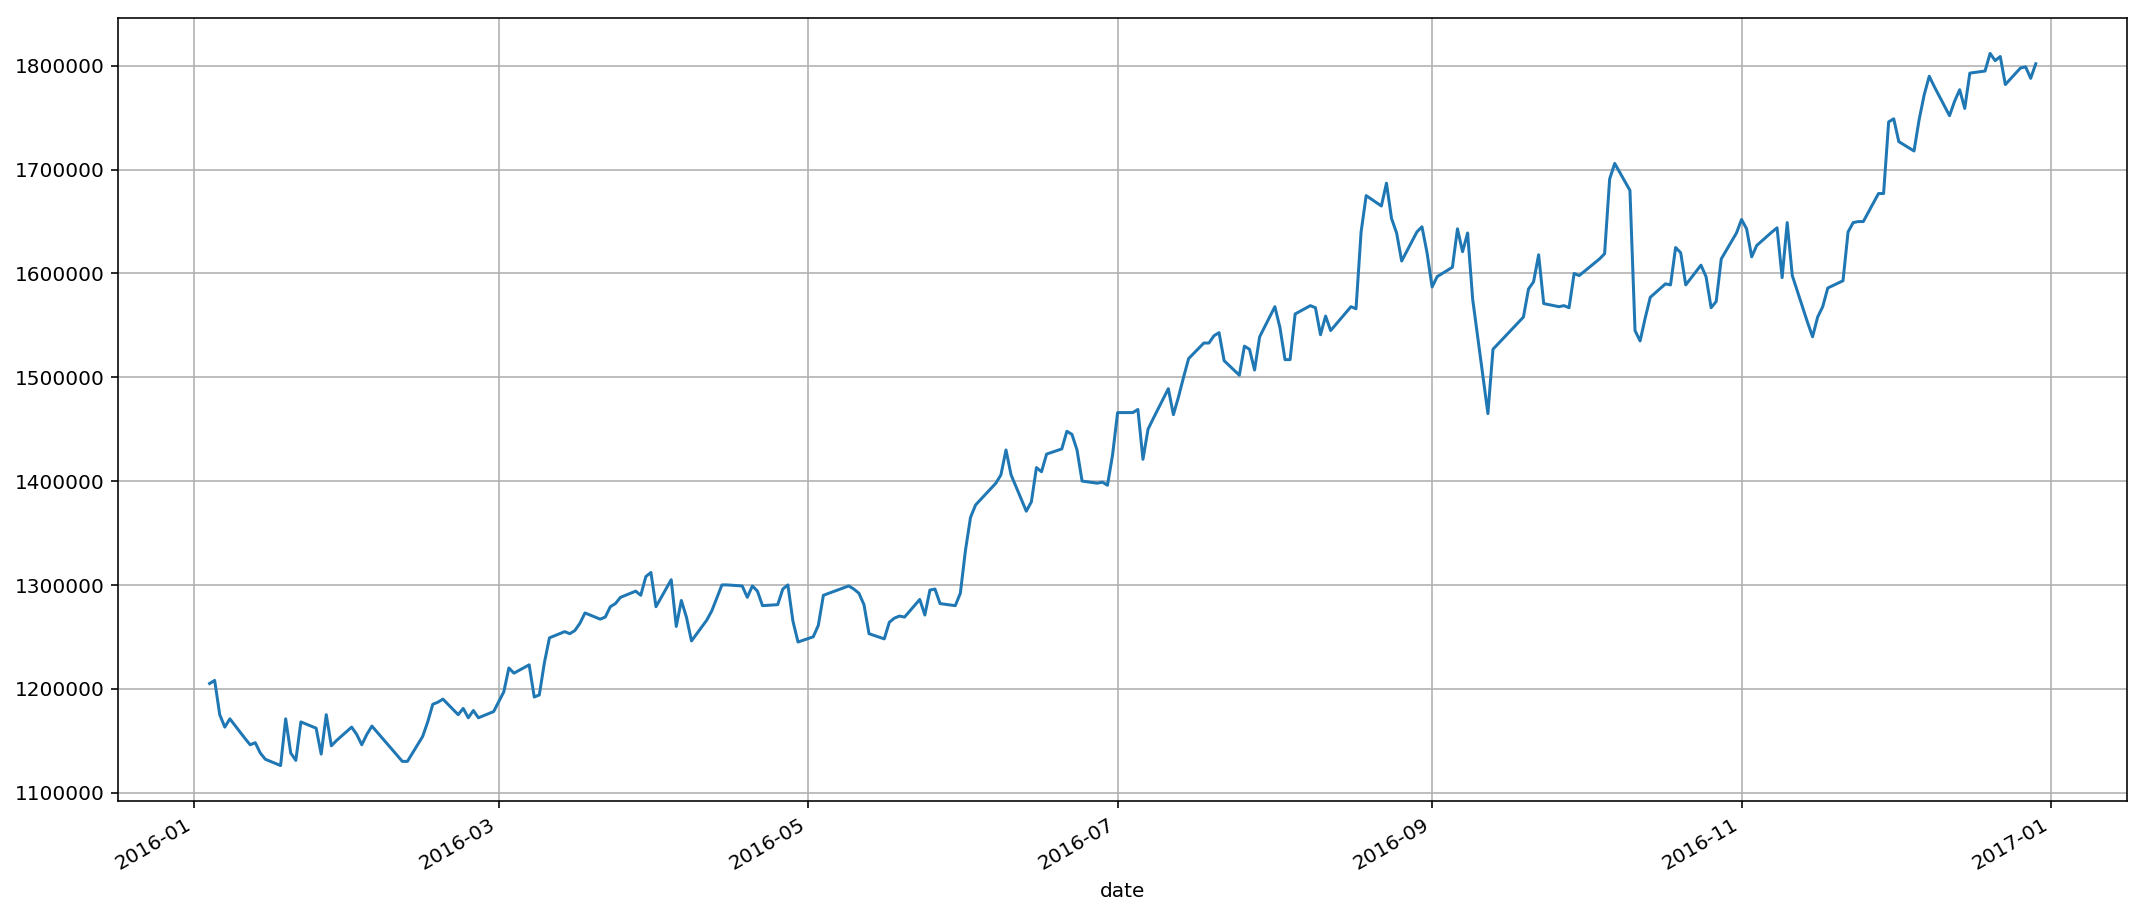

In [15]:
%matplotlib inline
df['close'].plot(figsize=(18,8), grid=True)